# Clustering

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 1. K-means cluster

In [2]:
data_file = '../data/weather_clustering.csv'
dataset = pd.read_csv(data_file)
print ('Data shape: ', dataset.shape)
print ('Columns: ', dataset.columns)
dataset.head(3)

Data shape:  (121878, 13)
Columns:  Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0


In [3]:
# describe the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,121878.0,60938.500000,35183.292391,0.00,30469.25,60938.50,91407.75,121877.00
air_pressure,121878.0,916.946590,2.960202,906.30,915.20,916.80,918.50,926.80
air_temp,121878.0,62.567613,11.497570,38.12,52.34,64.04,71.60,91.22
avg_wind_direction,121845.0,150.834938,97.570917,0.00,53.00,172.00,212.00,359.00
avg_wind_speed,121845.0,2.568209,1.804301,0.00,1.30,2.10,3.40,23.40
max_wind_direction,121845.0,152.336132,94.025442,0.00,61.00,179.00,216.00,359.00
max_wind_speed,121845.0,3.169245,2.121537,0.10,1.60,2.60,4.20,25.90
min_wind_direction,121845.0,156.126899,101.567320,0.00,54.00,169.00,210.00,359.00
min_wind_speed,121845.0,1.952774,1.533466,0.00,0.80,1.60,2.70,21.60
rain_accumulation,121877.0,0.000509,0.006558,0.00,0.00,0.00,0.00,0.40


### Basic Data Exploratory Analysis

In [5]:
# print ('Zero rain accumulation: ', dataset[dataset['rain_accumulation'] == 0].shape)
# print ('NaN rain accumulation: \t', dataset[dataset['rain_accumulation'].isna()].shape)

# print ('\nZero rain duration: \t', dataset[dataset['rain_duration'] == 0].shape)
# print ('NaN rain duration: \t', dataset[dataset['rain_duration'].isna()].shape)

print ('\nCount number of rows for each column having NaN value')
print (dataset.isna().sum())


Count number of rows for each column having NaN value
rowID                  0
hpwren_timestamp       0
air_pressure           0
air_temp               0
avg_wind_direction    33
avg_wind_speed        33
max_wind_direction    33
max_wind_speed        33
min_wind_direction    33
min_wind_speed        33
rain_accumulation      1
rain_duration          1
relative_humidity      0
dtype: int64


### Basic Data Cleaning

In [6]:
# Drop all the Rows with NaN in columns: 'rain_accumulation' & 'rain_duration'
subset_cols = ['rain_accumulation', 'rain_duration']
dataset_2 = dataset.dropna(subset = subset_cols)

print ('\nCount number of rows for each column having NaN value')
print (dataset_2.isna().sum())


Count number of rows for each column having NaN value
rowID                  0
hpwren_timestamp       0
air_pressure           0
air_temp               0
avg_wind_direction    33
avg_wind_speed        33
max_wind_direction    33
max_wind_speed        33
min_wind_direction    33
min_wind_speed        33
rain_accumulation      0
rain_duration          0
relative_humidity      0
dtype: int64


In [7]:
# Drop all the Rows with NaN in any column
subset_cols = dataset.columns
dataset_2 = dataset.dropna(subset = dataset.columns)

print ('\nCount number of rows for each column having NaN value')
print (dataset_2.isna().sum())
print ('\nShape of new dataset: ', dataset_2.shape)


Count number of rows for each column having NaN value
rowID                 0
hpwren_timestamp      0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
rain_accumulation     0
rain_duration         0
relative_humidity     0
dtype: int64

Shape of new dataset:  (121844, 13)


### Select subset of features to train the model

In [8]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

select_df = dataset_2[features]
print ('Shape of select_df: ', select_df.shape)

Shape of select_df:  (121844, 7)


### Scale the features
-- `Previously we used MinMaxScaler, let's use StandardScaler now` <br>
<br>
__MinMaxScaler:__ `For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.`
<br>
__StandardScaler:__ `standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.`
<br>
Properties: `StandardScaler does distort the relative distances between the feature values, but MinMaxScaler do not.`
<br>
<br> Choose your scaler wisely

In [9]:
X = StandardScaler().fit_transform(select_df)
print ('X shape: ', X.shape, '\n')
sample_records = X[0:3].tolist()
for i in range(len(sample_records)):
    print (str(i) + " >> " + str(sample_records[i]) + '\n')

X shape:  (121844, 7) 

0 >> [-1.570446725112506, 0.11208630595004684, 0.10417687266375614, -0.980005061005026, 0.6664531322823162, -0.7868172557708727, -0.2635842210557309]

1 >> [-1.570446725112506, 0.1433994231902675, -0.7567364734367524, -1.035428314358796, -0.09929782183999827, -0.9282244821839098, -0.1508308553898554]

2 >> [-1.570446725112506, 0.15905598181037842, -0.6337488525652513, -0.758312047589947, -0.4289961493093281, -0.7396815136331936, 0.0855874919740771]



### Build Model

In [10]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

#euclidean distance = 12 * 121000^3 * 300

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


### Understanding clusters

In [11]:
centers = model.cluster_centers_
print ('Centroid shape: ', centers.shape)
print ('\nCentroid space: \n', centers)

Centroid shape:  (12, 7)

Centroid space: 
 [[-1.59494731 -1.08832927  0.33601898  2.35048382  0.45496581  2.39242113
   0.94878509]
 [-0.34457096 -0.86188397 -1.03740979 -0.59602115 -0.84859165 -0.5995731
   0.90298973]
 [ 0.1143351   0.76832007 -1.13768688 -0.56056394 -1.02504931 -0.59664066
  -0.674447  ]
 [ 0.17379282  0.80520492  0.29375167 -0.63822234  0.50580378 -0.63647361
  -0.59714016]
 [ 0.01890336  0.10257022  1.94605789 -0.6371508  -1.39974881 -0.54914727
  -0.07416646]
 [-0.95114077 -1.29536018  0.50728555  0.60290421  0.60437914  0.62717876
   1.33064057]
 [ 0.05443321  0.52481237  1.50357159 -0.6316878   1.78436076 -0.58456965
  -0.58160807]
 [ 1.67594135 -0.31050593 -0.99448141  2.37303896 -0.91784988  2.42906469
  -1.04961958]
 [-0.19861782 -1.01230538  0.68999304 -0.52348675  0.90608122 -0.5056384
   1.21977238]
 [ 1.93105542 -0.24070405 -0.89653466 -0.11529782 -0.77818914 -0.13086398
  -0.59853569]
 [ 0.08119822  0.61095117 -1.0499882   0.82093133 -0.98011024  0.788

### Plots

In [13]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('cluster_number')
    
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['cluster_number'] = P['cluster_number'].astype(int)
    return P

# Function that creates Parallel Plots
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'cluster_number', color = my_colors, marker='o')

In [14]:
# value of centroid based on features
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster_number
0,-1.594947,-1.088329,0.336019,2.350484,0.454966,2.392421,0.948785,0
1,-0.344571,-0.861884,-1.037410,-0.596021,-0.848592,-0.599573,0.902990,1
2,0.114335,0.768320,-1.137687,-0.560564,-1.025049,-0.596641,-0.674447,2
3,0.173793,0.805205,0.293752,-0.638222,0.505804,-0.636474,-0.597140,3
4,0.018903,0.102570,1.946058,-0.637151,-1.399749,-0.549147,-0.074166,4
5,-0.951141,-1.295360,0.507286,0.602904,0.604379,0.627179,1.330641,5
6,0.054433,0.524812,1.503572,-0.631688,1.784361,-0.584570,-0.581608,6
7,1.675941,-0.310506,-0.994481,2.373039,-0.917850,2.429065,-1.049620,7
8,-0.198618,-1.012305,0.689993,-0.523487,0.906081,-0.505638,1.219772,8
9,1.931055,-0.240704,-0.896535,-0.115298,-0.778189,-0.130864,-0.598536,9


In [15]:
## DRY DAYS
dry_days_centroid = P[P['relative_humidity'] < -0.5]
print ('\nDRY DAYS Centroid')
print (dry_days_centroid)

## WARM DAYS
warm_days_centroid = P[P['air_temp'] > 0.5]
print ('\n\nWARM DAYS Centroid')
print (warm_days_centroid)

## COOL DAYS
cool_days_centroid = P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)]
print ('\n\nCOOL DAYS Centroid')
print (cool_days_centroid)


DRY DAYS Centroid
    air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
2       0.114335  0.768320           -1.137687       -0.560564   
3       0.173793  0.805205            0.293752       -0.638222   
6       0.054433  0.524812            1.503572       -0.631688   
7       1.675941 -0.310506           -0.994481        2.373039   
9       1.931055 -0.240704           -0.896535       -0.115298   
10      0.081198  0.610951           -1.049988        0.820931   

    max_wind_direction  max_wind_speed  relative_humidity  cluster_number  
2            -1.025049       -0.596641          -0.674447               2  
3             0.505804       -0.636474          -0.597140               3  
6             1.784361       -0.584570          -0.581608               6  
7            -0.917850        2.429065          -1.049620               7  
9            -0.778189       -0.130864          -0.598536               9  
10           -0.980110        0.788023          -0.788968     

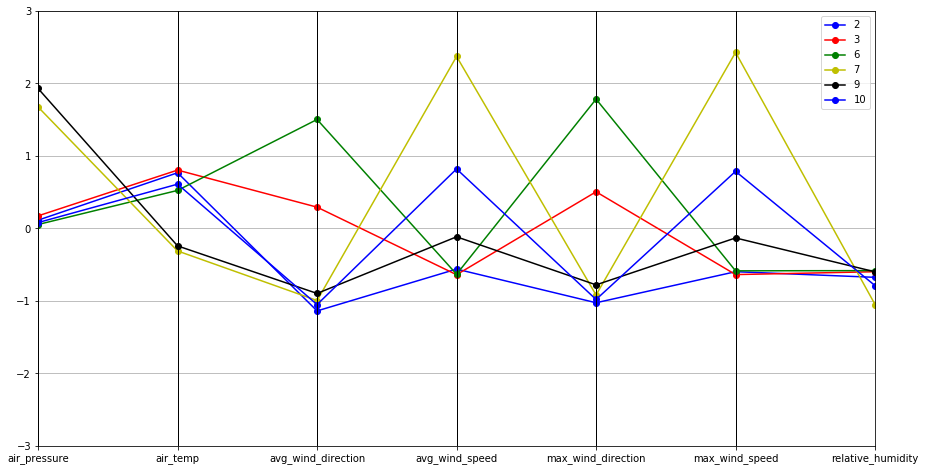

In [16]:
parallel_plot(dry_days_centroid)

In [ ]:
parallel_plot(warm_days_centroid)

In [ ]:
parallel_plot(cool_days_centroid)